https://www.bls.gov/developers/api_python.htm#python2

In [9]:
# IMPORTS
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import config

In [3]:
api_key = config.BLS_KEY
base_url = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

In [12]:
with open("BLS_Series_IDs.json", "r") as file:
    bls_series_ids = json.load(file)
series = {
    bls_series_ids["CPI_ALL"]: "CPI_ALL",
    bls_series_ids["CPI_CORE"]: "CPI_CORE"
}

# Start year and end year
date_range = (1975, 2024)

# Handle dates
dates = [(str(date_range[0]), str(date_range[1]))]
while int(dates[-1][1]) - int(dates[-1][0]) > 10:
    dates = [(str(date_range[0]), str(date_range[0]+9))]
    d1 = int(dates[-1][0])
    while int(dates[-1][1]) < date_range[1]:
        d1 = d1 + 10
        d2 = min([date_range[1], d1+9])
        dates.append((str(d1),(d2))) 

In [15]:
df = pd.DataFrame()

for start, end in dates:
    # Submit the list of series as data
    data = json.dumps({
        "seriesid": list(series.keys()),
        "startyear": start,
        "endyear": end
    })

    # Post request for the data
    p = requests.post(
        '{}?registrationkey={}'.format(base_url, api_key), 
        headers={'Content-type': 'application/json'}, 
        data=data).json()
    for s in p['Results']['series']:
        col = series[s['seriesID']]
        for r in s['data']:
            date = pd.to_datetime('{} {}'.format(
                r['periodName'], r['year']))
            df.at[date, col] = float(r['value'])
df = df.sort_index().pct_change(12).dropna().multiply(100)
# Output results
print('Post Request Status: {}'.format(p['status']))
df.tail(5)

Post Request Status: REQUEST_SUCCEEDED


,CPI_ALL,CPI_CORE
2024-05-01,3.269029,3.411063
2024-06-01,2.971397,3.276939
2024-07-01,2.894753,3.213193
2024-08-01,2.530730,3.265559
2024-09-01,2.440633,3.258714


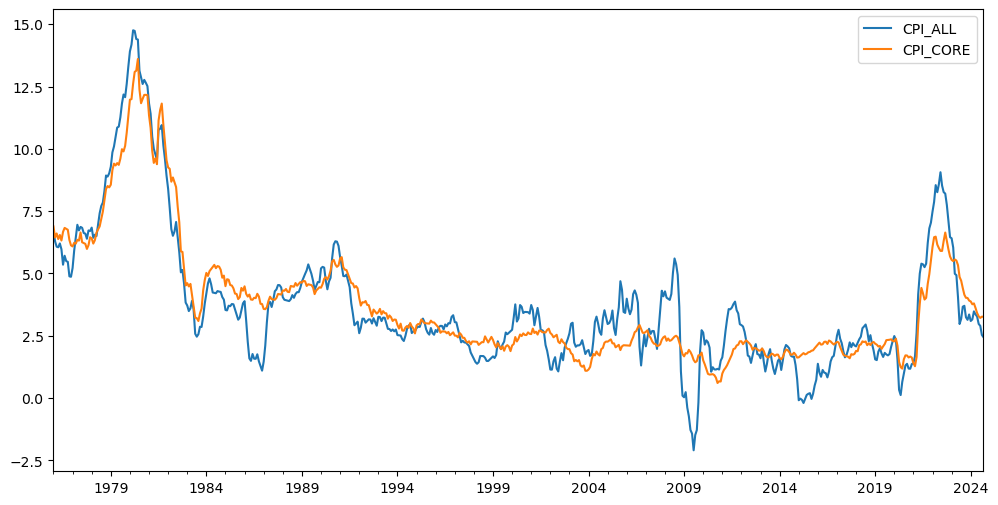

In [18]:
df.plot(figsize=(12,6))
plt.show()